# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

lat = []
lng = []
temp = []
humidity = []
wind_speed = []
cloudiness = []
country = []
date = []
new_cities = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append((response['coord']['lon']))
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        new_cities.append(city)
        print(f"Processing {city} found!.")
    except:
        print(f'{city} result does not exist')
        pass

taolanaro result does not exist
nizhneyansk result does not exist
Processing pirai found!.
Processing nanortalik found!.
Processing geraldton found!.
Processing barrow found!.
Processing carhuamayo found!.
Processing hermanus found!.
Processing lompoc found!.
Processing albany found!.
Processing vaini found!.
Processing gabu found!.
amderma result does not exist
Processing necochea found!.
Processing mahebourg found!.
Processing ranong found!.
Processing husavik found!.
Processing airai found!.
Processing gazli found!.
Processing tasiilaq found!.
Processing lebu found!.
Processing cockburn town found!.
Processing channel-port aux basques found!.
Processing souillac found!.
Processing kavieng found!.
Processing cherat found!.
Processing ushuaia found!.
Processing longyearbyen found!.
Processing rikitea found!.
Processing yertsevo found!.
Processing port alfred found!.
Processing torbay found!.
Processing butaritari found!.
Processing faya found!.
Processing pachino found!.
Processing ch

Processing moron found!.
Processing dongying found!.
Processing touros found!.
Processing vila found!.
Processing torit found!.
Processing kaitangata found!.
Processing san policarpo found!.
Processing vila franca do campo found!.
Processing waddan found!.
Processing bowen found!.
Processing portland found!.
Processing kodiak found!.
Processing shenjiamen found!.
malwan result does not exist
Processing artyom found!.
Processing khani found!.
Processing port blair found!.
Processing lorengau found!.
Processing rawson found!.
Processing te anau found!.
Processing ust-uda found!.
Processing salinopolis found!.
Processing mangaluru found!.
Processing praia found!.
Processing san patricio found!.
Processing pontian kecil found!.
Processing hamilton found!.
Processing anna found!.
Processing vostok found!.
Processing labuhan found!.
Processing santa marta found!.
Processing kameoka found!.
Processing pierre found!.
Processing namibe found!.
sentyabrskiy result does not exist
Processing yanji

Processing matara found!.
Processing zhigansk found!.
Processing birzai found!.
Processing noumea found!.
Processing provideniya found!.
Processing progreso found!.
Processing utica found!.
Processing abapo found!.
Processing aksu found!.
Processing huanren found!.
Processing tulum found!.
cambyreta result does not exist
Processing ulagan found!.
Processing tucuman found!.
Processing tooele found!.
Processing verkhnyaya sinyachikha found!.
Processing ndioum found!.
Processing acarau found!.
Processing odoyev found!.
Processing merced found!.
Processing suez found!.
Processing quatre cocos found!.
Processing tabuk found!.
Processing sioux lookout found!.
Processing poya found!.
Processing gornyye klyuchi found!.
Processing henties bay found!.
Processing jiaozuo found!.
Processing arona found!.
Processing bandarbeyla found!.
Processing nkowakowa found!.
Processing jawhar found!.
Processing mareeba found!.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_dict = {
    "City": new_cities,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temperature": temp,
    "Humidity": humidity,
    "Wind Speed": wind_speed,
    "Cloudiness": cloudiness,
    "Country": country,
    "Data Receiving Time (GMT)": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Latitude,Longitude,Max Temperature,Humidity,Wind Speed,Cloudiness,Country,Data Receiving Time (GMT)
0,pirai,-22.63,-43.90,80.60,61,14.99,40,BR,1603739036
1,nanortalik,60.14,-45.24,36.05,84,8.84,100,GL,1603738704
2,geraldton,-28.77,114.60,55.40,93,10.25,40,AU,1603738900
3,barrow,71.29,-156.79,17.60,92,3.36,75,US,1603738501
4,carhuamayo,-10.92,-76.03,53.91,49,15.10,100,PE,1603739036
...,...,...,...,...,...,...,...,...,...
567,arona,28.10,-16.68,73.00,64,23.04,20,ES,1603739087
568,bandarbeyla,9.49,50.81,76.78,76,15.95,98,SO,1603738916
569,nkowakowa,-23.89,30.29,66.20,52,16.11,0,ZA,1603739087
570,jawhar,2.78,45.50,79.20,79,9.55,100,SO,1603739087


In [8]:
weather_data.describe()

,Latitude,Longitude,Max Temperature,Humidity,Wind Speed,Cloudiness,Data Receiving Time (GMT)
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,20.941661,18.757622,58.812570,71.426573,7.953234,53.195804,1.603739e+09
std,33.187459,89.889133,22.569443,22.177043,5.628229,40.735490,2.096202e+02
min,-54.800000,-179.170000,-5.800000,6.000000,0.270000,0.000000,1.603738e+09
25%,-4.742500,-59.585000,44.282500,61.000000,3.895000,5.000000,1.603739e+09
50%,26.635000,23.850000,64.400000,78.000000,6.930000,64.000000,1.603739e+09
75%,47.895000,100.342500,77.725000,88.000000,10.290000,97.250000,1.603739e+09
max,78.220000,179.320000,95.000000,100.000000,32.820000,100.000000,1.603739e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
humidity_over = weather_data.loc[(weather_data['Humidity'] > 100)]
humidity_over

,City,Latitude,Longitude,Max Temperature,Humidity,Wind Speed,Cloudiness,Country,Data Receiving Time (GMT)


In [79]:
#  Get the indices of cities that have humidity over 100%.


In [80]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

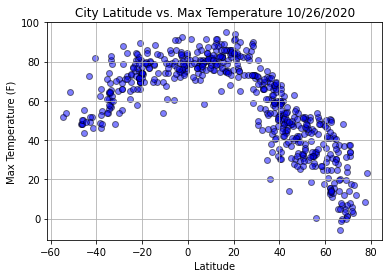

In [10]:
latitude = weather_data['Latitude']

plt.scatter(latitude,weather_data['Max Temperature'],marker="o",facecolors="blue", edgecolors="black",alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature 10/26/2020')
plt.grid()
plt.show()

#As postulated in the instructions, temperatures rise in general when approaching the equator,
#since there are negative values associated with the southern hemisphere, the shape is seen
#as more of a parabola.

## Latitude vs. Humidity Plot

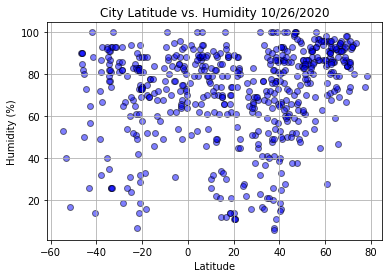

In [11]:
plt.scatter(latitude,weather_data['Humidity'],marker="o",facecolors="blue", edgecolors="black",alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity 10/26/2020')
plt.grid()
plt.show()

#Visually, there doesn't seen to be much of a relationship between humidity and latitude,
#there does appear to be clustering at 70% and above humidity throughout all locations. 

## Latitude vs. Cloudiness Plot

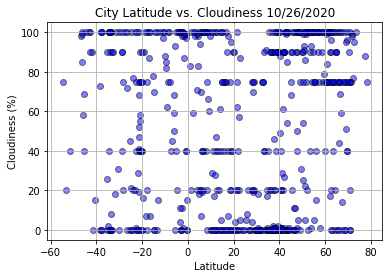

In [12]:
plt.scatter(latitude,weather_data['Cloudiness'],marker="o",facecolors="blue", edgecolors="black",alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness 10/26/2020')
plt.grid()
plt.show()

#Like humidity, cloudiness does not appear to have much relationship with a location's
#latitude, the cloudiness percentages appear to be reported on more regimented increments
#leading to lines of markers across the gridlines.

## Latitude vs. Wind Speed Plot

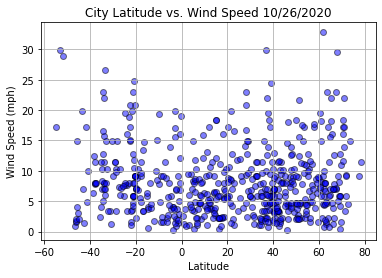

In [13]:
plt.scatter(latitude,weather_data['Wind Speed'],marker="o",facecolors="blue", edgecolors="black",alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed 10/26/2020')
plt.grid()
plt.show()

#Again, there does not appear to be much relationship between wind speed and latitude;
#but kind of in an inverse of the humidity plot, there are not too many values above 
#25 mph. 

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

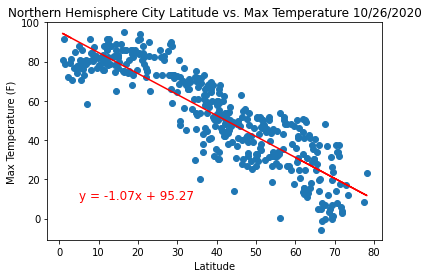

The r-value is -0.8803858420120912


In [14]:
northern_hem = weather_data.loc[(weather_data['Latitude'] > 0)]
northern_lat = northern_hem['Latitude']

plt.scatter(northern_lat,northern_hem['Max Temperature'],marker="o")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere City Latitude vs. Max Temperature 10/26/2020')
slope, intercept, r, p, std_err = linregress(northern_lat,northern_hem['Max Temperature'])
fit = slope * northern_lat + intercept
plt.plot(northern_lat,fit,color='r')
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq,(5,10),fontsize=12,color="red")
plt.show()
print(f'The r-value is {r}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

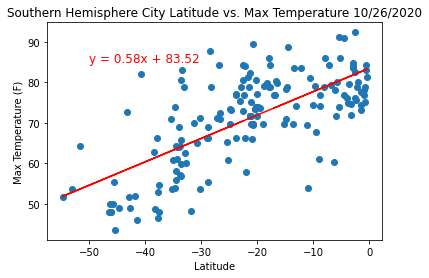

The r-value is 0.6964700929500935


In [15]:
southern_hem = weather_data.loc[(weather_data['Latitude'] < 0)]
southern_lat = southern_hem['Latitude']

plt.scatter(southern_lat,southern_hem['Max Temperature'],marker="o")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere City Latitude vs. Max Temperature 10/26/2020')
slope, intercept, r, p, std_err = linregress(southern_lat,southern_hem['Max Temperature'])
fit = slope * southern_lat + intercept
plt.plot(southern_lat,fit,color='r')
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq,(-50,85),fontsize=12,color="red")
plt.show()
print(f'The r-value is {r}')

#Both northern and southern hemisphere plots show relatively strong correlation,
#going in opposite directions as we would expect. There is a slightly stronger correlation 
#in the northern hemisphere with more scattering seen in the southern graph. It is somewhat 
#notable that there is almost a perfect exact -1 slope for the northern hemisphere, showing
#that for every degree you move north from the equator you would see 1 degree less Fahrenheit. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

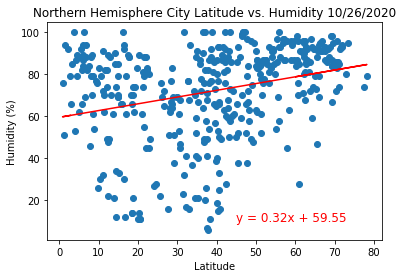

The r-value is 0.2835627814594313


In [16]:
plt.scatter(northern_lat,northern_hem['Humidity'],marker="o")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere City Latitude vs. Humidity 10/26/2020')
slope, intercept, r, p, std_err = linregress(northern_lat,northern_hem['Humidity'])
fit = slope * northern_lat + intercept
plt.plot(northern_lat,fit,color='r')
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq,(45,10),fontsize=12,color="red")
plt.show()
print(f'The r-value is {r}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

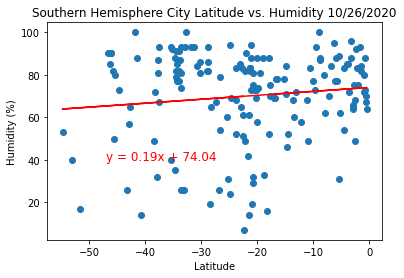

The r-value is 0.11765297982805116


In [17]:
plt.scatter(southern_lat,southern_hem['Humidity'],marker="o")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere City Latitude vs. Humidity 10/26/2020')
slope, intercept, r, p, std_err = linregress(southern_lat,southern_hem['Humidity'])
fit = slope * southern_lat + intercept
plt.plot(southern_lat,fit,color='r')
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq,(-47,40),fontsize=12,color="red")
plt.show()
print(f'The r-value is {r}')

#There is much less relationship seen with humidity and latitude than we saw with temperature,
#with the greater of the 2 correlation coefficients being only 0.33 in the nothern hemisphere,
#but this is significant more than seen in the south, showing basically no relationship. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

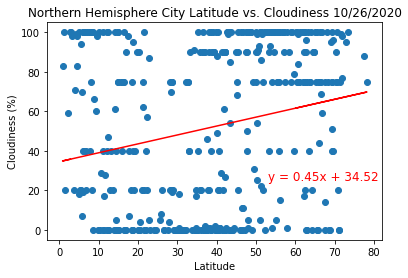

The r-value is 0.21867140874700727


In [19]:
plt.scatter(northern_lat,northern_hem['Cloudiness'],marker="o")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere City Latitude vs. Cloudiness 10/26/2020')
slope, intercept, r, p, std_err = linregress(northern_lat,northern_hem['Cloudiness'])
fit = slope * northern_lat + intercept
plt.plot(northern_lat,fit,color='r')
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq,(53,25),fontsize=12,color="red")
plt.show()
print(f'The r-value is {r}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

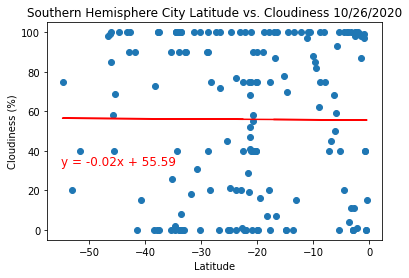

The r-value is -0.005682834950733586


In [20]:
plt.scatter(southern_lat,southern_hem['Cloudiness'],marker="o")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere City Latitude vs. Cloudiness 10/26/2020')
slope, intercept, r, p, std_err = linregress(southern_lat,southern_hem['Cloudiness'])
fit = slope * southern_lat + intercept
plt.plot(southern_lat,fit,color='r')
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq,(-55,33),fontsize=12,color="red")
plt.show()
print(f'The r-value is {r}')

#As we saw on the visual breakdown of all the cities previously, there is almost no relationship
#on the cloudiness here at all. This does make logical sense though, given that cloudiness
#is more localized than some of our other weather measures.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

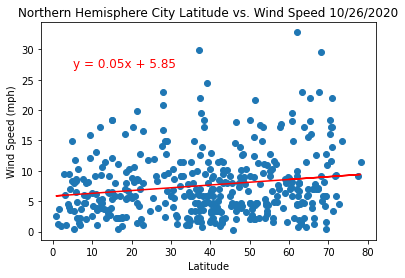

The r-value is 0.16850920335087327


In [21]:
plt.scatter(northern_lat,northern_hem['Wind Speed'],marker="o")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere City Latitude vs. Wind Speed 10/26/2020')
slope, intercept, r, p, std_err = linregress(northern_lat,northern_hem['Wind Speed'])
fit = slope * northern_lat + intercept
plt.plot(northern_lat,fit,color='r')
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq,(5,27),fontsize=12,color="red")
plt.show()
print(f'The r-value is {r}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

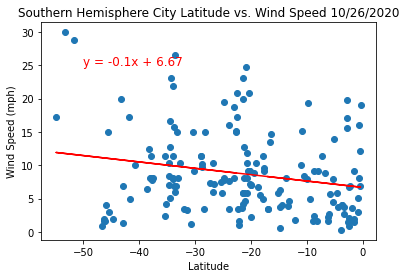

The r-value is -0.21142349196735452


In [22]:
plt.scatter(southern_lat,southern_hem['Wind Speed'],marker="o")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere City Latitude vs. Wind Speed 10/26/2020')
slope, intercept, r, p, std_err = linregress(southern_lat,southern_hem['Wind Speed'])
fit = slope * southern_lat + intercept
plt.plot(southern_lat,fit,color='r')
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq,(-50,25),fontsize=12,color="red")
plt.show()
print(f'The r-value is {r}')

#Again there is limited to no relationship shown, but as kind of an inverse of the humidity numbers.

In [23]:
weather_data.to_csv('../weather_data.csv')